In [1]:
from manim import *

Manim Community v0.17.3

## Plotting Curves

You can make an arbitrary path of line segments by calling the appropriate method of a generic `VMObject` instance.

In [13]:
%%manim -v WARNING -qm PlotCurves

class PlotCurves(Scene):
    def construct(self):
        # initial empty object
        curve = VMobject()
        self.add(curve)
        self.wait()
        
        curve.set_points_as_corners([UP, DOWN, LEFT, RIGHT]) # left open
        self.wait()
        
        curve.set_points_as_corners([UP*2, DOWN*2, LEFT*2, RIGHT*2, UP*2]) # closed (replaces old curve)
        self.wait()
        
        curve.set_points_as_corners(Circle().points) # more points = looks smoother (but close-up is jagged)
        self.wait()

## Animating Curve Plotting

In [2]:
%%manim -v WARNING -qm PlotCurves2

class PlotCurves2(Scene):
    def construct(self):
        curve = VMobject()
        
        points = Circle().points
        curve.set_points_as_corners(points)  # not added to scene yet
        
        self.play(Create(curve), run_time=3, rate_func=linear)  # animate the drawing of the circle

## Curve Following

Use an `updater` to update an object on each frame to follow the drawing of the curve.

`get_end()` tells you the end of the curve drawn so far.

In [23]:
%%manim -v WARNING -qm PlotCurves3

class PlotCurves3(Scene):
    def construct(self):
        curve = VMobject()
        
        points = Circle().points
        curve.set_points_as_corners(points)  # not added to scene yet
        
        # all the dot stuff here
        def dot_updater(old_dot):
            old_dot.move_to(curve.get_end())
        dot = Dot(radius=0.2)
        dot.add_updater(dot_updater)
        self.add(dot)
        
        self.play(Create(curve), run_time=3, rate_func=linear)  # animate the drawing of the circle

## Curve Styling

Use `stroke` and `stroke_size`

## 2D Graph

There's a lot of __configuration__ you can do here, but the basic ID is you add the axes, and you add a plot that comes from the axes.

In [26]:
%%manim -v WARNING -qm Graph2D

class Graph2D(Scene):
    def construct(self):
        axes = Axes(x_range=[0, 10, 1], y_range=[0, 100, 10])
        self.add(axes)
        graph = axes.plot(lambda x: x**2, x_range=[0, 10])
        self.add(graph)
        self.wait()
        
        # animate drawing the graph just like any other shape
        self.remove(graph)
        self.play(Create(graph))
        
        # translating between real coords and graph coords
        points = axes.coords_to_point([2, 3], [4, 9])
        self.add(Dot().move_to(list(zip(*points))[0]))
        self.add(Dot().move_to(list(zip(*points))[1]))
        self.wait()

## 3D Graph

This is a __subclass__ of `Axes` and thus behaves similarly, but it behaves better by default.  It also interacts well with a `ThreeDScene`.

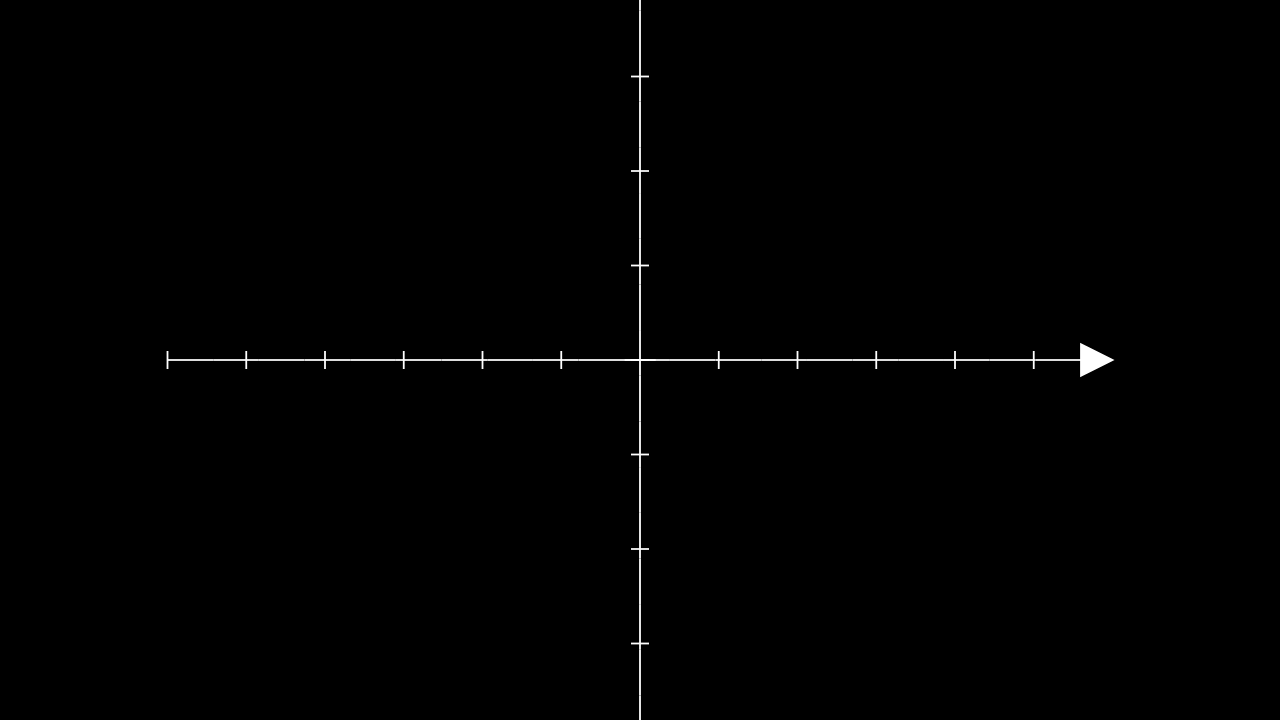

In [27]:
%%manim -v WARNING -qm Graph3D

class Graph3D(Scene):
    def construct(self):
        axes = ThreeDAxes()
        self.add(axes)

## Number Plane

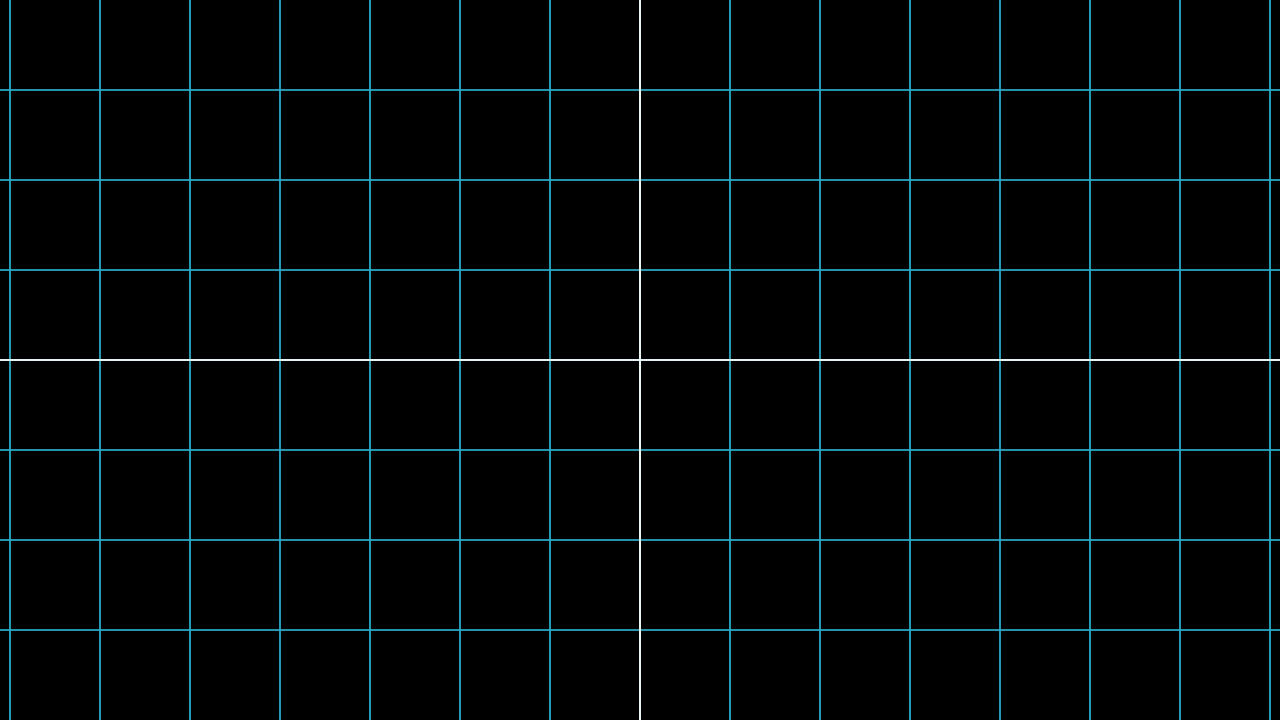

In [2]:
%%manim -v WARNING -qm NumberPlaneScene

class NumberPlaneScene(Scene):
    def construct(self):
        plane = NumberPlane()
        self.add(plane)